# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## please add the essential libraries
from numpy.random import seed
seed(123)

tf.random.set_seed(123)


## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/
!ls

/content/drive/My Drive/Colab Notebooks
 assignment_24062021.ipynb	    model.h5    pictures
'Copy of Welcome To Colaboratory'   PA5.ipynb   te_topic_extraction.ipynb


In [ ]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 50
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)

# Your Code HERE
train_generator = datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size)
valid_generator = datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size)
test_generator  = datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height), batch_size=batch_size)

# extracting labeles from generators
train_lable = train_generator.class_indices
valid_lable = valid_generator.class_indices
test_lable  = test_generator.class_indices

# please print the number of samples in each folder 
# Your Code HERE
print(train_generator.samples)
print(valid_generator.samples)
print(test_generator.samples)


Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
4176
1392
1392


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [ ]:
input_shape = (img_width, img_height, 3)

In [ ]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (img_width, img_height, 3)

# define the Convolutional Neural Network with relu and softmax
# Your Code HERE
model = keras.Sequential([
    keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

# summry of the model
model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 96)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 256)     221440    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 512)       1180160   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 512)     

In [ ]:
# Compiling the model and training including the files of compile and fit
#Your code 

model.compile(optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])
              
#Train the model with training and validation set
model.fit(train_generator, 
          epochs=epochs, 
          validation_data=valid_generator)


Epoch 1/50
261/261 [==============================] - 56s 204ms/step - loss: 0.6403 - accuracy: 0.8214 - val_loss: 0.7392 - val_accuracy: 0.8491
Epoch 2/50
261/261 [==============================] - 53s 202ms/step - loss: 0.0441 - accuracy: 0.9885 - val_loss: 0.7284 - val_accuracy: 0.8578
Epoch 3/50
261/261 [==============================] - 53s 203ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 1.1191 - val_accuracy: 0.8542
Epoch 4/50
261/261 [==============================] - 53s 203ms/step - loss: 4.8062e-05 - accuracy: 1.0000 - val_loss: 1.1848 - val_accuracy: 0.8534
Epoch 5/50
261/261 [==============================] - 53s 202ms/step - loss: 1.0722e-05 - accuracy: 1.0000 - val_loss: 1.2105 - val_accuracy: 0.8570
Epoch 6/50
261/261 [==============================] - 53s 202ms/step - loss: 5.8834e-06 - accuracy: 1.0000 - val_loss: 1.2294 - val_accuracy: 0.8570
Epoch 7/50
261/261 [==============================] - 53s 202ms/step - loss: 4.2660e-06 - accuracy: 1.0000 - val_loss:

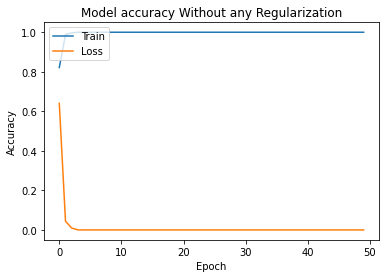

In [ ]:
# plot the training accuracy and validation loss
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('Model accuracy Without any Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Loss'], loc='upper left')
plt.show()

In [ ]:
print(f'Train Mean Accuracy : {np.mean(model.history.history["accuracy"]): .4f}')
print(f'Train Mean Accuracy : {np.mean(model.history.history["loss"]): .4f}')

Train Mean Accuracy :  0.9961
Train Mean Accuracy :  0.0139


%Test

In [ ]:
# Test the model on a testing dataset
# Your Code HERE
score, acc = model.evaluate(test_generator, verbose=1)
print(f'Test loss:  {score: .4f}')
print(f'Test Accuracy: {acc: .4f}')

87/87 [==============================] - 7s 81ms/step - loss: 1.7715 - accuracy: 0.8384
Test loss:   1.7715
Test Accuracy:  0.8384


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
# Your Code HERE
model_L1_reg = keras.Sequential([
    keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Summary of the model
model_L1_reg.summary()


In [ ]:

# Compiling the model and training 
model_L1_reg.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# fit the model with training and validation set
model_L1_reg.fit(train_generator,
                    epochs=epochs,
                    validation_data=valid_generator)



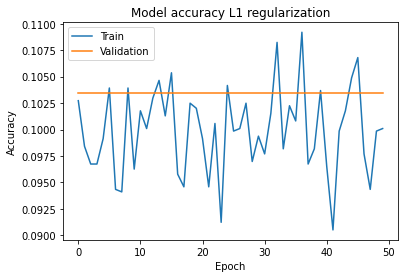

In [ ]:
# plot the training accuracy and validation loss
plt.plot(model_L1_reg.history.history['accuracy'])
plt.plot(model_L1_reg.history.history['loss'])
plt.title('Model accuracy with L1 regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Loss'], loc='upper left')
plt.show()

In [ ]:
print(f'Train Mean Accuracy : {np.mean(model_L1_reg.history.history["accuracy"]): .4f}')
print(f'Train Mean Loss : {np.mean(model_L1_reg.history.history["loss"]): .4f}')

In [ ]:
# Test the model on a testing dataset
# Your Code HERE
score_L1, acc_L1 = model_L1_reg.evaluate(test_generator, verbose=1)
print(f'Test loss:  {score_L1: .4f}')
print(f'Test Accuracy: {acc_L1*100: .4f}%')

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [ ]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D
# Your Code HERE
model_L2_reg = keras.Sequential([
    keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

# summary
model_L2_reg.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 96)      2688      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 96)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 256)     221440    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 512)       1180160   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 512)     

In [ ]:
# Compile the model and train
model_L2_reg.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# fit the model with training and validation set
model_L2_reg.fit(train_generator,
                    epochs=epochs,
                    validation_data=valid_generator)


Epoch 1/50
261/261 [==============================] - 54s 205ms/step - loss: 0.6968 - accuracy: 0.8175 - val_loss: 0.8013 - val_accuracy: 0.8455
Epoch 2/50
261/261 [==============================] - 53s 203ms/step - loss: 0.0352 - accuracy: 0.9907 - val_loss: 1.0064 - val_accuracy: 0.8642
Epoch 3/50
261/261 [==============================] - 53s 203ms/step - loss: 0.0204 - accuracy: 0.9959 - val_loss: 1.1946 - val_accuracy: 0.8376
Epoch 4/50
261/261 [==============================] - 53s 202ms/step - loss: 0.0427 - accuracy: 0.9885 - val_loss: 0.8744 - val_accuracy: 0.8326
Epoch 5/50
261/261 [==============================] - 53s 202ms/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 1.0022 - val_accuracy: 0.8728
Epoch 6/50
261/261 [==============================] - 53s 202ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.0978 - val_accuracy: 0.8807
Epoch 7/50
261/261 [==============================] - 53s 202ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.1203 - val_ac

In [ ]:
# plot the training accuracy and  loss
plt.plot(model_L2_reg.history.history['accuracy'])
plt.plot(model_L2_reg.history.history['loss'])
plt.title('Model accuracy with L2 regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Loss'], loc='upper left')
plt.show()

In [ ]:
print(f'Train Mean Accuracy : {np.mean(model_L2_reg.history.history["accuracy"]): .4f}')
print(f'Train Mean Loss : {np.mean(model_L2_reg.history.history["loss"]): .4f}')

In [ ]:
# Test the model on a testing dataset
# Your Code HERE
score_L2, acc_L2 = model_L2_reg.evaluate(test_generator, verbose=1)
print(f'Test loss:  {score_L2: .4f}')
print(f'Test Accuracy: {acc_L2*100: .4f}%')

### Dropout 

In [ ]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D
# Your Code HERE
model_Drop_reg = keras.Sequential([
    keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

# summary
model_Drop_reg.summary()


In [ ]:
# Compile the model and train
model_Drop_reg.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# fit the model with training and validation set
model_Drop_reg.fit(train_generator,
                    epochs=epochs,
                    validation_data=valid_generator)


In [ ]:
# plot the training accuracy and  loss
plt.plot(model_Drop_reg.history.history['accuracy'])
plt.plot(model_Drop_reg.history.history['loss'])
plt.title('Model accuracy with Dropout (0.2) regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Loss'], loc='upper left')
plt.show()

In [ ]:
print(f'Train Mean Accuracy : {np.mean(model_Drop_reg.history.history["accuracy"]): .4f}')
print(f'Train Mean loss : {np.mean(model_Drop_reg.history.history["loss"]): .4f}')

In [ ]:
# Test the model on a testing dataset
# Your Code HERE
score_drop, acc_drop = model_Drop_reg.evaluate(test_generator, verbose=1)
print(f'Test loss:  {score_drop: .4f}')
print(f'Test Accuracy: {acc_drop*100: .4f} %')

## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [ ]:
# load pre-trained resnet50 from libarary
# Your code HERE
from tensorflow.keras.applications.resnet50 import ResNet50

input_shape = (img_width, img_height, 3)


resnet50 = ResNet50(include_top=False,
                    weights='imagenet',
                    input_shape=input_shape,
                    pooling="max")

# define the freezing 10 layers 
for layer in resnet50.layers[:103]:
    layer.trainable = False


for i, layer in enumerate(resnet50.layers):
    # print(i, layer.name, layer.trainable)
    if layer.trainable:
        print(i, layer.name, layer.trainable)

# Fine-tune the model 
resNet_model = keras.Sequential([
    resnet50,
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

resNet_model.summary()



94781440/94765736 [==============================] - 1s 0us/step
103 conv4_block3_1_conv True
104 conv4_block3_1_bn True
105 conv4_block3_1_relu True
106 conv4_block3_2_conv True
107 conv4_block3_2_bn True
108 conv4_block3_2_relu True
109 conv4_block3_3_conv True
110 conv4_block3_3_bn True
111 conv4_block3_add True
112 conv4_block3_out True
113 conv4_block4_1_conv True
114 conv4_block4_1_bn True
115 conv4_block4_1_relu True
116 conv4_block4_2_conv True
117 conv4_block4_2_bn True
118 conv4_block4_2_relu True
119 conv4_block4_3_conv True
120 conv4_block4_3_bn True
121 conv4_block4_add True
122 conv4_block4_out True
123 conv4_block5_1_conv True
124 conv4_block5_1_bn True
125 conv4_block5_1_relu True
126 conv4_block5_2_conv True
127 conv4_block5_2_bn True
128 conv4_block5_2_relu True
129 conv4_block5_3_conv True
130 conv4_block5_3_bn True
131 conv4_block5_add True
132 conv4_block5_out True
133 conv4_block6_1_conv True
134 conv4_block6_1_bn True
135 conv4_block6_1_relu True
136 conv4_block6

In [ ]:
# Compile the model and train
resNet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Fit the model with training and validation set

resNet_model.fit(train_generator,  
                    epochs=epochs,
                    validation_data=valid_generator)



Epoch 1/50
261/261 [==============================] - 40s 134ms/step - loss: 7.4327 - accuracy: 0.2852 - val_loss: 2929.7126 - val_accuracy: 0.1034
Epoch 2/50
261/261 [==============================] - 38s 143ms/step - loss: 1.6962 - accuracy: 0.6176 - val_loss: 6.6375 - val_accuracy: 0.2227
Epoch 3/50
261/261 [==============================] - 36s 138ms/step - loss: 1.1165 - accuracy: 0.7641 - val_loss: 11.3000 - val_accuracy: 0.2083
Epoch 4/50
261/261 [==============================] - 36s 138ms/step - loss: 0.8142 - accuracy: 0.8355 - val_loss: 1.1992 - val_accuracy: 0.7622
Epoch 5/50
261/261 [==============================] - 36s 139ms/step - loss: 0.3657 - accuracy: 0.9176 - val_loss: 2.6563 - val_accuracy: 0.6573
Epoch 6/50
261/261 [==============================] - 36s 137ms/step - loss: 0.2228 - accuracy: 0.9447 - val_loss: 0.9851 - val_accuracy: 0.8233
Epoch 7/50
261/261 [==============================] - 36s 139ms/step - loss: 0.2662 - accuracy: 0.9449 - val_loss: 0.5368 - va

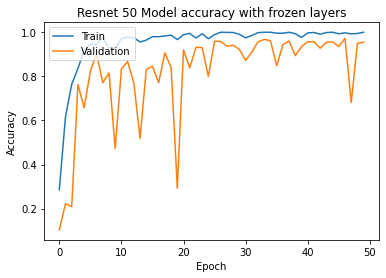

In [ ]:
#Plot three different traning process with with different frozen layers (at least three layers)
# Frozen layers: 1. the first layer 2. the second layer 3. the third layer
# your Code HERE
plt.plot(resNet_model.history.history['accuracy'])
plt.plot(resNet_model.history.history['val_accuracy'])
plt.title('Resnet 50 Model accuracy with frozen layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(f'Train Mean Accuracy : {np.mean(resNet_model.history.history["accuracy"]): .4f}')
print(f'Train Mean loss : {np.mean(resNet_model.history.history["loss"]): .4f}')

Train Mean Accuracy :  0.9533
Train Mean loss :  0.3407


In [ ]:
# Test the model on a testing dataset
# Your Code HERE
score_res50, acc_res50 = resNet_model.evaluate(test_generator, verbose=1)
print(f'Test loss:  {score_res50: .4f}')
print(f'Test Accuracy: {acc_res50*100: .4f} %')

87/87 [==============================] - 8s 86ms/step - loss: 0.6130 - accuracy: 0.9562
Test loss:   0.6130
Test Accuracy:  95.6178 %
